In [12]:
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('../../data/raw/carst.csv.zip')
df.head(10)

,brand/model/year,cap_vol,consumo,power,weight,cemm,nu_cy,Etype
0,Gurgel BR800 0.8 1991,792,12.0,33,650,34.4,2,0
1,FIAT UNO Mille EP 1996,994,10.4,58,870,18.6,4,0
2,Hyundai HB20 Sense 2020,1000,12.8,80,989,14.5,3,0
3,FIAT Strada 1.4 2016,1368,10.3,86,1084,12.5,4,0
4,VolksWagen GOL 1.6 2015,1598,10.5,104,961,9.8,4,0
5,Chevrolet Cruze LTZ 1.8 2016,1796,8.5,144,1427,10.2,4,0
6,Honda Civic EXR 2016,1997,9.5,155,1294,10.9,4,0
7,Ford Focus 2.0 GLX 2012,1999,9.2,148,1347,10.4,4,0
8,BMW 325i 3.0 2012,2996,6.5,218,1460,7.1,6,0
9,AUDI A4 3.2 V6 Fsi 2011,3197,7.1,269,1610,6.4,6,0


In [14]:
#@title tratamento de dados
df1 = pd.DataFrame(data=df)
c0=df1["brand/model/year"]
c1=df1["cap_vol"]
c2=df1["consumo"]
c3=df1["power"]
c4=df1["weight"]
c5=df1["cemm"]
c6=df1["nu_cy"]
c7=df1["Etype"]

In [15]:
!pip3 install -U stemgraphic

In [16]:
# importar biblioteca para realizar diagrama de ramo e folha (stem-leaf)
import stemgraphic

# Observar todas as variáveis e escolher as adequadas
# c1, scale=1000 --> Capacidade volumétrica ou cilindrada
# c2, scale=1 --> Consumo
# c3, scale=100 --> Potência
# c4, scale=100 --> Peso
# c5, scale=10 --> 0-100

# stemgraphic.stem_graphic(c5, scale = 1)
stemgraphic.stem_graphic(c1, scale = 1000)


ModuleNotFoundError: No module named 'stemgraphic'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# @title Gráfico Corrigido: Consumo vs Capacidade
# 1. Criar um dataframe temporário para ordenar os dados pela cilindrada (c1)
# Isso evita que a linha fique "indo e voltando" no gráfico
plot_df = pd.DataFrame({
    'modelo': c0,
    'cap': c1,
    'consumo': c2
}).sort_values(by='cap')

fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo 1: Capacidade (Linha Azul com Diamantes)
ax1.plot(plot_df['modelo'], plot_df['cap'], color='tab:blue', marker='d',
         linewidth=2, label='Capacidade Volumétrica (cc)')
ax1.set_ylabel('Capacidade Volumétrica (cc)', color='tab:blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)

# Criar o segundo eixo Y
ax2 = ax1.twinx()

# Eixo 2: Consumo (Linha Vermelha com Quadrados)
ax2.plot(plot_df['modelo'], plot_df['consumo'], color='tab:red', marker='s',
         linewidth=2, label='Consumo urbano (km/L)')
ax2.set_ylabel('Consumo urbano (km/L)', color='tab:red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='tab:red')

# Ajustar os limites para dar "respiro" e não cruzarem tanto
ax1.set_ylim(0, plot_df['cap'].max() * 1.1)
ax2.set_ylim(0, plot_df['consumo'].max() * 1.2)

# Melhorar a visualização do Eixo X
plt.title('Análise de Eficiência: Capacidade Volumétrica vs Consumo Urbano', fontsize=14)
fig.autofmt_xdate(rotation=45)
fig.tight_layout()

plt.show()

In [ ]:
# Consumo vs. capacidade volumétrica --> c1, c2

plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi': 100})

plt.scatter(c1, c2, label=f'Correlação = {np.round(np.corrcoef(c1,c2)[0,1], 2)}')

plt.xlabel('Capacidade volumétrica')
plt.ylabel('Consumo de combustível')
plt.title('Gráfico de dispersão: Consumo vs. capacidade volumétrica')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
sns.jointplot(x=c1,y=c2)

In [ ]:
df1 = pd.DataFrame(data=df)
plt.rcParams.update({'figure.figsize': (10,8), 'figure.dpi': 250})
sns.lmplot(x='cap_vol', y='consumo', hue='brand/model/year', data=df1);


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# @title Gráfico: Capacidade Volumétrica vs Potência
# Ordenando os dados pela capacidade para a linha ficar fluida
plot_df = pd.DataFrame({
    'modelo': c0,
    'cap': c1,
    'potencia': c3
}).sort_values(by='cap')

fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo 1: Capacidade (Azul com Diamantes)
line1 = ax1.plot(plot_df['modelo'], plot_df['cap'], color='tab:blue',
                 marker='d', linewidth=2, label='Capacidade Volumétrica (cc)')
ax1.set_ylabel('Capacidade Volumétrica (cc)', color='tab:blue', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)

# Eixo 2: Potência (Vermelho com Quadrados)
ax2 = ax1.twinx()
line2 = ax2.plot(plot_df['modelo'], plot_df['potencia'], color='tab:red',
                 marker='s', linewidth=2, label='Potência (cv)')
ax2.set_ylabel('Potência (cv)', color='tab:red', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Unir legendas e jogar para fora à direita
lines = line1 + line2
labels = [l.get_label() for l in lines]
leg = ax1.legend(lines, labels, loc='center left', bbox_to_anchor=(1.12, 0.5), frameon=True)

# Colorir o texto da legenda
for text, line in zip(leg.get_texts(), lines):
    text.set_color(line.get_color())

plt.title('Correlação: Capacidade Volumétrica vs Potência', fontsize=14)
fig.autofmt_xdate(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

In [ ]:
# Consumo vs. capacidade volumétrica --> c1, c2

plt.rcParams.update({'figure.figsize': (9,7), 'figure.dpi': 100})

plt.scatter(c1, c3, label=f'Correlação = {np.round(np.corrcoef(c1,c3)[0,1], 2)}')

plt.xlabel('Capacidade volumétrica')
plt.ylabel('Potência')
plt.title('Gráfico de dispersão: Potência vs. capacidade volumétrica')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# @title Gráfico: Peso vs Velocidade (0-100 km/h)
# Ordenando pelo peso para facilitar a visualização da correlação
plot_df_pv = pd.DataFrame({
    'modelo': c0,
    'peso': c4,
    'vel': c5
}).sort_values(by='peso')

fig, ax1 = plt.subplots(figsize=(14, 6))

# Eixo 1: Peso (Verde com Círculos)
line1 = ax1.plot(plot_df_pv['modelo'], plot_df_pv['peso'], color='tab:green',
                 marker='o', linewidth=2, label='Peso (kg)')
ax1.set_ylabel('Peso (kg)', color='tab:green', fontweight='bold')
ax1.tick_params(axis='y', labelcolor='tab:green')
ax1.grid(True, axis='both', linestyle='--', alpha=0.5)

# Eixo 2: 0-100 km/h (Roxo com Triângulos)
ax2 = ax1.twinx()
line2 = ax2.plot(plot_df_pv['modelo'], plot_df_pv['vel'], color='tab:purple',
                 marker='^', linewidth=2, label='0-100 km/h (s)')
ax2.set_ylabel('Tempo 0-100 km/h (s)', color='tab:purple', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='tab:purple')

# Unir legendas e posicionar fora do gráfico
lines = line1 + line2
labels = [l.get_label() for l in lines]
leg = ax1.legend(lines, labels, loc='center left', bbox_to_anchor=(1.12, 0.5), frameon=True)

for text, line in zip(leg.get_texts(), lines):
    text.set_color(line.get_color())

plt.title('Análise de Performance: Peso vs Aceleração (0-100 km/h)', fontsize=14)
fig.autofmt_xdate(rotation=45)
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()

# Exercício 2

O artigo "Experiência em campo no uso de um método acelerado na estimativa da resistência do concreto em 28 dias" (Some field experience in the use of an accelerated method in estimating 28-day strength of concrete, J. of Amer. Concrete Institute, 1969: 895) fez a regressão de $ y = \text{resistência do concreto usando tratamento padrão de 28 dias} $ (1 psi = 7 KPa) em relação a $ x = \text{resistência do concreto usando tratamento acelerado (psi)} $.

Suponha que a equação da reta de regressão verdadeira seja $ y = 1800 + 1,3x $.

**a.** Qual é o valor esperado da resistência aos 28 dias quando a resistência usando o tratamento acelerado é igual a 2500?

**b.** Até que ponto podemos esperar que a resistência aos 28 dias mude quando a resistência usando tratamento acelerado aumenta em 1 psi vezes?

**c.** Responda ao item (b) para um aumento de 100 psi.

**d.** Responda ao item (b) para uma diminuição de 100 psi.


In [ ]:
# a. y = 1800 + 1.3(2500)
y = 1800 + 1.3*2500
print(f"o valor esperado para x=2500 é {y}")

In [ ]:
# b.
# b0=1800
# b1=1,3
# mudança na variação é em B1. B1 * 1
B1=1,3

In [ ]:
# c.
#b1x100
b1=130
y=180 + 130x

In [ ]:
# d.
#b1x100
b1=130
y=180 - 130x


# Exercício 3

Em relação ao exercício anterior, suponha que o desvio padrão (σ) do desvio aleatório (ε) seja 350 psi (1 psi = 7 KPa).

- a. Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando tratamento acelerado for 2.000?

- b. Repita o item (a), substituindo 2.000 por 2.500.

- c. Considere fazer duas observações independentes sobre a resistência aos 28 dias, a primeira para uma resistência usando tratamento acelerado de 2.000 e a segunda para x = 2.500. Qual é a probabilidade de que a segunda observação exceda a primeira em mais de 1.000 psi?

- d. Sejam Y₁ e Y₂ as observações sobre a resistência aos 28 dias quando x = x₁ e x = x₂, respectivamente. Em quanto x₂ excederia x₁ para que P(Y₂ > Y₁) = 0,95?


## Dados

- σ = 350 outra notação V = 350
- Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi → Y = 1800 + 1,3x > 5000
- Quando o valor da resistência usando tratamento acelerado for 2.000? → x = 2000

O valor esperado de Y para x = 2000 usando µY:x = β₀ + β₁x é:
µY:2000 = 1800 + 1,3(2000).


In [17]:
x=2000
uy = 1800 + 1.3*x
print('O valor esperado de Y para x=2500 é ', uy)

O valor esperado de Y para x=2500 é  4400.0


Considerando o desvio aleatório $\sigma = 350$, calcular $P(Y > 5000)$ e considerando que o comportamento do desvio aleatório pode ser descrito mediante uma distribuição normal:

$P(Y > 5000) = P\left(Z > \frac{x - \mu}{\sigma}\right)$ ou

$P(Y > 5000 \text{ quando } x = 2000) = P\left(Z > \frac{Y - \mu_{3000}}{\sigma}\right)$

$P(Y > 5000) = P\left(Z > \frac{5000 - 4400}{350}\right)$


In [19]:
y = 5000
y = 4400
Si= 350
valor =  (y-uy)/Si
valor

0.0

Text(0, 0.5, 'Densidade de Probabilidade')

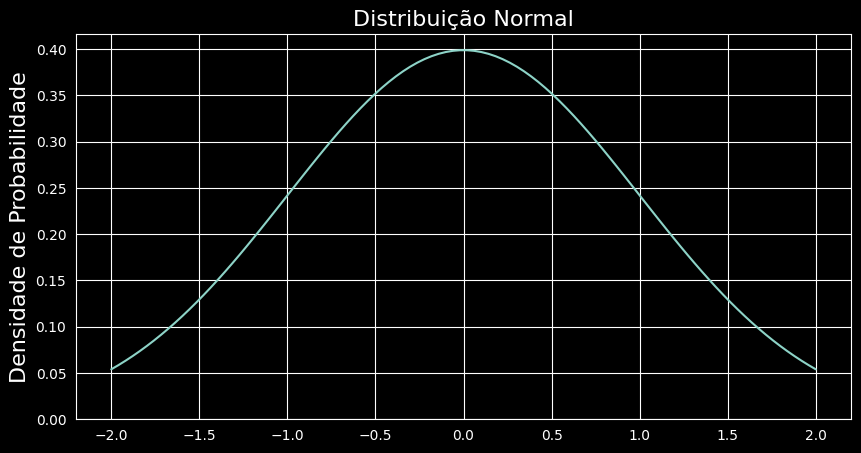

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Gera dados para a distribuição normal
x = np.linspace(-2, 2, num=100)
constant = 1.0 / np.sqrt(2 * np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

# Cria o gráfico
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(x, pdf_normal_distribution)

# Personaliza o gráfico
ax.set_ylim(0)
ax.set_title('Distribuição Normal', size=16)
ax.set_ylabel('Densidade de Probabilidade', size=16)


P(Y > 5000) = P(Z > 1,71) o valor 1.71 deve ser procurado na tabela Z e subtrair de 1

P(Y > 5000) = 1 - Φ(1,71)


In [22]:
# Importar bibliotecas necessárias
from scipy.integrate import quad

# Definir a equação considerando uma média de zero
def normal_probability_density(x):
    c = 1.0 / np.sqrt(2*np.pi)
    return c * np.exp(-x**2 / 2.0)

# Obter o valor da tabela Z
PzA = quad(normal_probability_density, np.inf, 1.71)[0]
print("Phi(1.71) =", PzA)

Phi(1.71) = -0.043632936524031905


$P(Y > 5000) = 1 - \Phi(1.71)$

Da tabela $Z\Phi(1,71) = 0,9564$

$P(Y > 5000) = 1 - 0.9564$

In [23]:
PYm=1-PzA
PYm

1.043632936524032

# Resposta b)

Qual é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi, quando o valor da resistência usando tratamento acelerado for 2.500?

## Dados

- σ = 350 outra notação V = 350
- μ é a probabilidade de o valor observado de resistência aos 28 dias ultrapassar 5.000 psi → Y = 1800 + 1,3x > 5000
- quando o valor da resistência usando tratamento acelerado for 2.000? → x = 2500

O valor esperado de Y para x = 2500 usando μY:x= β₀ + β₁xᵢ é:

μY:2500 = 1800 + 1,3(2500).


Resposta c)

Considere fazer duas observações independentes sobre a resistência aos 28 dias, a primeira para uma resistência usando tratamento acelerado de x = 2.000 e a segunda para x = 2.500. Qual é a probabilidade de que a segunda observação exceda a primeira em mais de 1.000 psi?
